In [1]:
import cmocean as cmo
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import numpy as np
import time
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
import xarray as xr
from xmitgcm import open_mdsdataset

In [2]:
from IPython.display import HTML

HTML('''<script>
code_show=true; 
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
<form action="javascript:code_toggle()"><input type="submit" value="Click here to toggle on/off the raw code."></form>''')

There is a problem with Dask chunks, even if I'm explicitly saying chunks=None it just ignores me :-( and doing anything in the time axis takes a million years. Even trying to plot a simple time series. That is why I ended up doing the horrible piece of code below and saved the data.

In [3]:
sns.set_context('paper')

In [4]:
outdir = '/data/SO2/sio-kramosmusalem/exp06_512x612x100_ORL_SVB/01_SVB_febTS_output/'
outdir2 = '/data/SO2/sio-kramosmusalem/exp06_512x612x100_ORL/01_noSVB_febTS/'

levels = [1,   2,  3,  4,  5,  6,  7,  8,  9, 10, 
          11, 12, 13, 14, 15, 16, 17,
          18, 19, 20, 21, 22, 23, 24, 25,
          26, 27, 28, 29, 30, 31,
          32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44,
          45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57,              
          58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 
          74, 79, 84, 89, 94, 99,]
ds = open_mdsdataset(outdir, prefix=['eta','dynVars'], levels=levels,
                     iters=[ii for ii in range(10,7210,10)],
                     chunks=None)
ds2 = open_mdsdataset(outdir2, prefix=['eta','dynVars'], levels=levels,
                     iters=[ii for ii in range(10,7210,10)],
                     chunks=None)

In [5]:
depth_nob = ds2.Depth[:]
LAT = ds2['YC'][:]
LON = ds2['XC'][:]-360
lat = ds2.YC[:,0].data
lon = ds2.XC[0,:].data-360
Z = ds2['Z'][:]
Zl = ds2['Zl'][:]

# centers mask
hFacC = ds2['hFacC'][:]
hfac = np.ma.masked_values(hFacC, 0)
mask = np.ma.getmask(hfac)
dep_masked = np.ma.masked_values(depth_nob,0)
mask_dep = np.ma.getmask(dep_masked)
time = np.arange(0,720)*600

# centers mask bathy with bay
depth_bay = ds.Depth[:]
hFacCSVB = ds['hFacC'][:]
hfacSVB = np.ma.masked_values(hFacCSVB, 0)
maskSVB = np.ma.getmask(hfacSVB)

#
omega = 7.3E-5
N200 = 0.006919
N500 = 0.003614

#
z2 = 37 # Zl[37] = -197.2 m
z4 = 55 # Zl[55] = -508.2 m
dt = 10*60


Stations where we will investigate SVB-induced vwerical velocity, w:

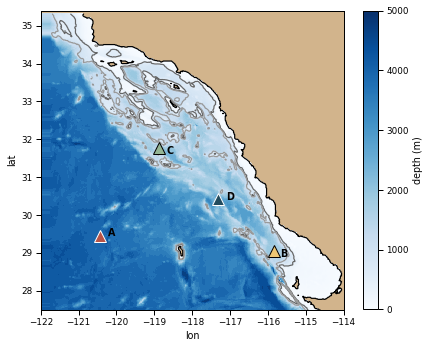

In [6]:
# Plot bay and approximate distances and reference circle
fig, (ax1) = plt.subplots(1,1,figsize=(7,5.5), sharey=True)
ax1.set_facecolor('tan')
pc1 = ax1.pcolormesh(lon,lat, np.ma.masked_array(depth_bay,mask=maskSVB[0,:,:]), 
                     cmap='Blues', vmin=0, vmax=5000)
plt.colorbar(pc1, ax=ax1, label='depth (m)')
ax1.contour(lon,lat,depth_bay,levels=[0,500, 1000], 
            colors=['k','0.4','0.6'], 
            alphas=[1,0.2,0.2])                                                                           
ax1.set_xlabel('lon')
ax1.set_ylabel('lat')
ax1.set_aspect(1)
ax1.set_xlim([-122,-114])
ax1.set_ylim([27.5,35.4])

pta = [100,180]
ptb = [395,150]
ptc = [200,350]
ptd = [300,250]
colors = [ "#b75347", "#edc775", "#94b594", "#224b5e"]
ax1.plot(lon[pta[0]], lat[pta[1]], '^', color=colors[0],
         markeredgecolor='1', markersize=12)
ax1.plot(lon[ptb[0]], lat[ptb[1]], '^', color=colors[1],
         markeredgecolor='0', markersize=12)
ax1.plot(lon[ptc[0]], lat[ptc[1]], '^', color=colors[2],
         markeredgecolor='0', markersize=12)
ax1.plot(lon[ptd[0]], lat[ptd[1]], '^', color=colors[3],
         markeredgecolor='1', markersize=12)

ax1.text(lon[pta[0]]+0.2, lat[pta[1]], 'A', fontweight='bold', color='k')
ax1.text(lon[ptb[0]]+0.15, lat[ptb[1]]-0.15, 'B', fontweight='bold')
ax1.text(lon[ptc[0]]+0.2, lat[ptc[1]]-0.15, 'C', fontweight='bold')
ax1.text(lon[ptd[0]]+0.2, lat[ptd[1]], 'D', fontweight='bold')

plt.show()

In [7]:
times = np.arange(720)*600

In [8]:
var = np.load('../w_4stations.npz')

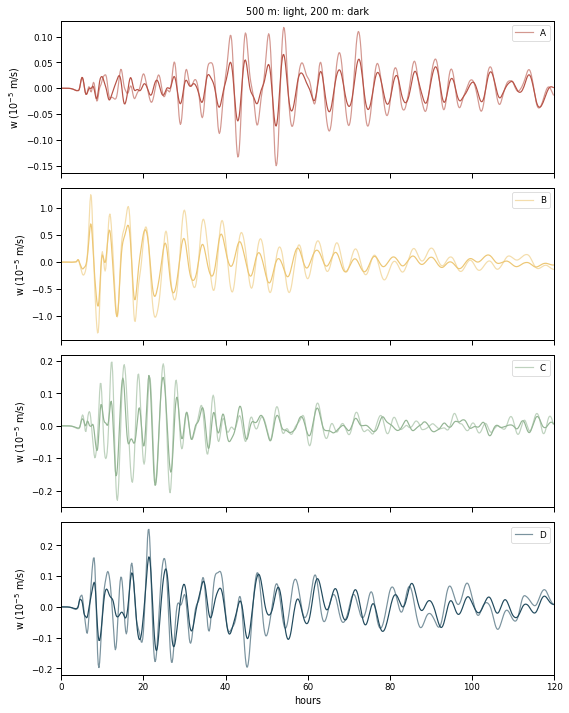

In [9]:
fig, (ax,ax2,ax3,ax4) = plt.subplots(4,1,figsize=(8,10), sharex=True)
ax.plot(times[:]/3600, var['w500'][0,:]*1E5, label='A', 
        color=colors[0], alpha=0.6)
ax.plot(times[:]/3600, var['w200'][0,:]*1E5, 
        color=colors[0], alpha=1)

ax2.plot(times[:]/3600, var['w500'][1,:]*1E5, label='B', 
        color=colors[1], alpha=0.6)
ax2.plot(times[:]/3600, var['w200'][1,:]*1E5, 
        color=colors[1], alpha=1)

ax3.plot(times[:]/3600, var['w500'][2,:]*1E5, label='C', 
        color=colors[2], alpha=0.6)
ax3.plot(times[:]/3600, var['w200'][2,:]*1E5, 
        color=colors[2], alpha=1)

ax4.plot(times[:]/3600, var['w500'][3,:]*1E5, label='D', 
        color=colors[3], alpha=0.6)
ax4.plot(times[:]/3600, var['w200'][3,:]*1E5, 
        color=colors[3], alpha=1)

ax.legend(ncol=2)
ax.set_xlim(0,24*5)

for axx in [ax,ax2,ax3,ax4]:
    axx.set_ylabel('w ($10^{-5}$ m/s)')
    axx.legend()
ax.set_title('500 m: light, 200 m: dark')
ax4.set_xlabel('hours')
plt.tight_layout()

w spectra at 200 m (considering 5 days):

0.987232
0.974759
1.056951
1.016141


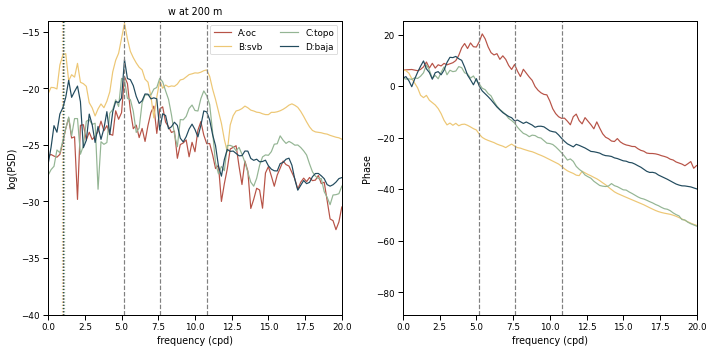

In [10]:
fig, (ax, ax2) = plt.subplots(1,2,figsize=(10,5))

st_names=['A:oc','B:svb','C:topo','D:baja']
for st, st_name, col, ind in zip(range(4), st_names, colors, [pta,ptb,ptc,ptd]):
    signalFFT = np.fft.rfft(var['w200'][st,:])
    
    ## Get Power Spectral Density
    signalPSD = np.abs(signalFFT) ** 2
    #signalPSD /= len(signalFFT)**2

    ## Get Phase
    signalPhase = np.angle(signalFFT)

    ## Get frequencies corresponding to signal 
    fftFreq = np.fft.rfftfreq(len(var['w200'][st,:]), dt)

    ax.plot(fftFreq*86400,np.log(signalPSD[:]),col,label=st_name)
    ax2.plot(fftFreq*86400,np.unwrap(signalPhase[:]+np.pi),col, label=st_name)
    f = 86400*2*omega*np.sin(np.radians(lat[ind[1]]))/(2*np.pi) #cpd
    print('%f' %f)
    ax.axvline(f, color=col, linestyle=':')
    ax.axvline(N200*86400, color=col, linestyle=':')

ax.legend(ncol=2)
ax.set_xlabel('frequency (cpd)')
ax.set_ylabel('log(PSD)')
ax2.set_xlabel('frequency (cpd)')
ax2.set_ylabel('Phase')
ax.set_xlim(0,20)
ax2.set_xlim(0,20)
ax.set_title('w at 200 m')
for axx in [ax,ax2]:
    axx.axvline(5.2, color='0.5', linestyle='--')
    axx.axvline(7.6, color='0.5', linestyle='--')
    axx.axvline(10.8, color='0.5', linestyle='--')

ax.set_ylim(-40,-14)
plt.tight_layout()
plt.show()

0.987232
0.974759
1.056951
1.016141


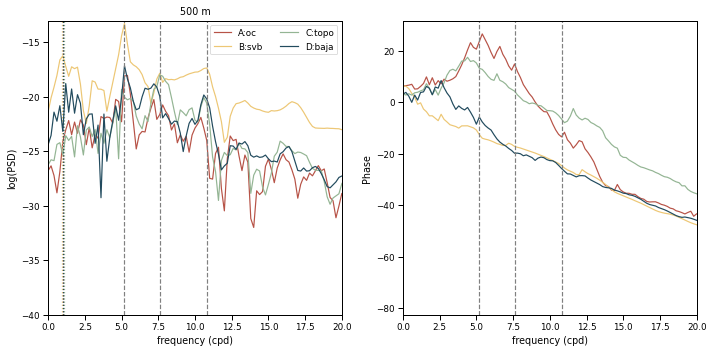

In [11]:
fig, (ax, ax2) = plt.subplots(1,2,figsize=(10,5))

st_names=['A:oc','B:svb','C:topo','D:baja']
for st, st_name, col, ind in zip(range(4), st_names, colors, [pta,ptb,ptc,ptd]):
    signalFFT = np.fft.rfft(var['w500'][st,:])
    
    ## Get Power Spectral Density
    signalPSD = np.abs(signalFFT) ** 2
    #signalPSD /= len(signalFFT)**2

    ## Get Phase
    signalPhase = np.angle(signalFFT)

    ## Get frequencies corresponding to signal 
    fftFreq = np.fft.rfftfreq(len(var['w500'][st,:]), dt)

    ax.plot(fftFreq*86400,np.log(signalPSD[:]),col,label=st_name)
    ax2.plot(fftFreq*86400,np.unwrap(signalPhase[:]+np.pi),col, label=st_name)
    f = 86400*2*omega*np.sin(np.radians(lat[ind[1]]))/(2*np.pi) #cpd
    print('%f' %f)
    ax.axvline(f, color=col, linestyle=':')
    ax.axvline(N500*86400, color=col, linestyle=':')

ax.legend(ncol=2)
ax.set_xlabel('frequency (cpd)')
ax.set_ylabel('log(PSD)')
ax2.set_xlabel('frequency (cpd)')
ax2.set_ylabel('Phase')
ax.set_xlim(0,20)
ax2.set_xlim(0,20)
ax.set_title('500 m')
for axx in [ax,ax2]:
    axx.axvline(5.2, color='0.5', linestyle='--')
    axx.axvline(7.6, color='0.5', linestyle='--')
    axx.axvline(10.8, color='0.5', linestyle='--')

ax.set_ylim(-40,-13)
plt.tight_layout()
plt.show()

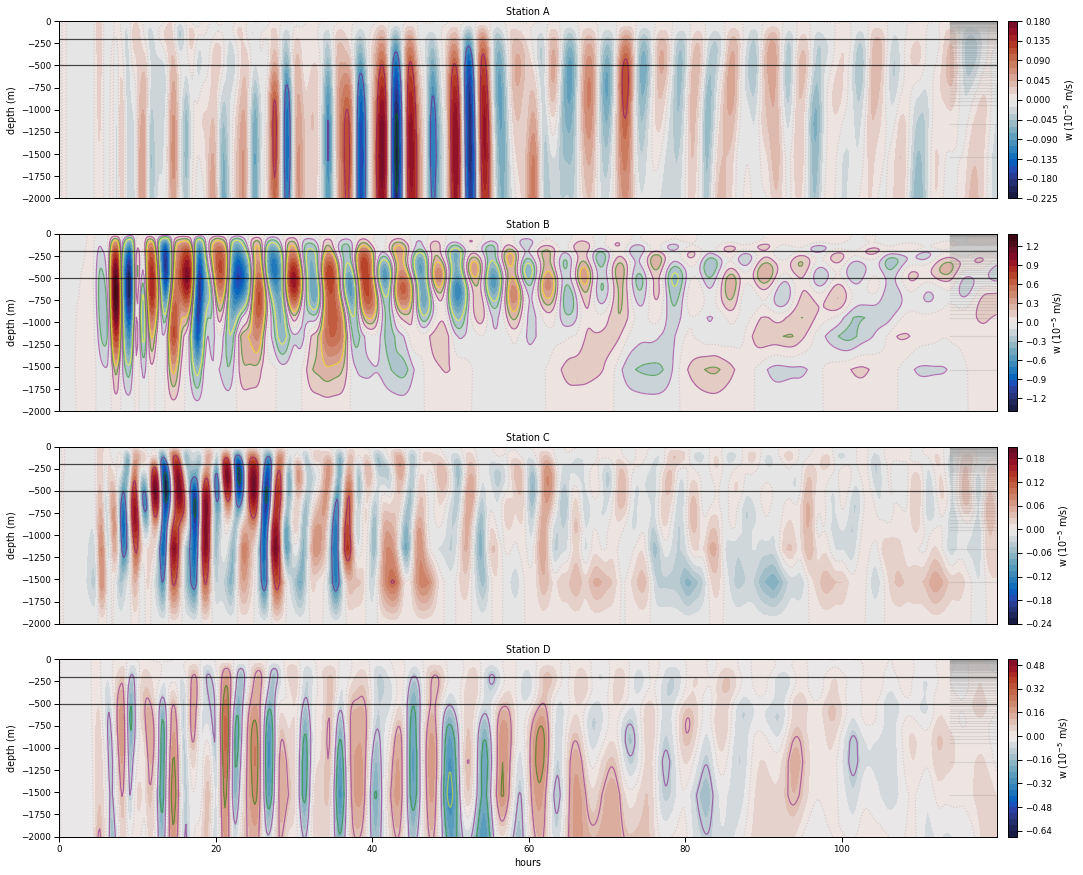

In [12]:
fig, (ax,ax2,ax3,ax4) = plt.subplots(4,1, figsize=(20,15))
ax4.set_facecolor('tan')
ax4.set_ylim(-2000,0)
for axx,st,pt in zip([ax,ax2,ax3,ax4],['A','B','C','D'],[pta,ptb,ptc,ptd]):
    varw = np.load('../wanom_tz_st%s.npz' %st)
    pc = axx.contourf(times/3600,Zl,
                      np.transpose(varw["w_st%s" %st])*1E5,30,
                       cmap=cmo.cm.balance, 
                       vmin=np.min(varw["w_st%s" %st])*1E5, 
                       vmax=-np.min(varw["w_st%s" %st])*1E5)
    plt.colorbar(pc,ax=axx, label='w (10$^{-5}$ m/s)',pad=0.01)
    pc = axx.contour(times/3600,Zl,
                     np.transpose(varw["w_st%s" %st])*1E5,
                     levels=[-0.3,-0.2,-0.1,0,0.1,0.2,0.3], alpha=0.5,
                     linestyles=['-','-','-',':','-','-','-'],
                     colors=['yellow','green','purple','0.7','purple','green','yellow'])
    
    axx.set_title('Station %s' %st)
    axx.set_ylabel('depth (m)')
    axx.axhline(-197, color='black', alpha=0.7)
    axx.axhline(-500, color='black', alpha=0.7)
    for kk in Zl:
        axx.axhline(kk,xmin=0.95, xmax=1, color='0.5', alpha=0.2)
  
ax4.set_xlabel('hours')
for axx in [ax,ax2,ax3]:
    axx.set_xticks([])
    axx.set_facecolor('tan')
    axx.set_ylim(-2000,0)

w max for station D is 3.246963e-06 m/s
w max for station A is 2.141053e-06 m/s
w max for station C is 2.326577e-06 m/s
w max for station B is 1.329059e-05 m/s


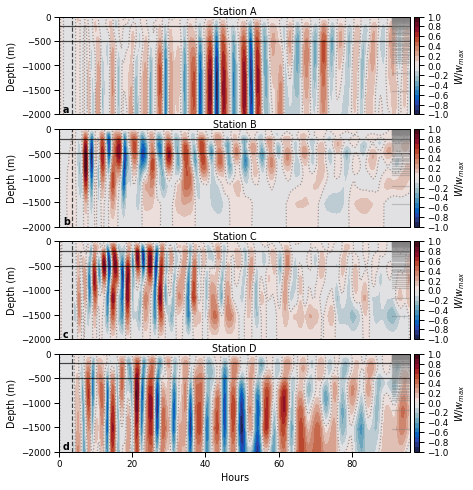

In [13]:
fig = plt.figure(figsize=(7.48,8))
gs0 = gridspec.GridSpec(4,1,  wspace=0.1, hspace=0.15)
ax1 = plt.subplot(gs0[0])
ax2 = plt.subplot(gs0[1])
ax3 = plt.subplot(gs0[2])
ax4 = plt.subplot(gs0[3])

for ax in [ax1,ax2,ax3]:
    ax.set_xticks([])

ax4.set_xlabel('Hours')

for ax in [ax1,ax2,ax3,ax4]:
    ax.set_ylim(-2000,0)
    ax.set_xlim(0,96)

# -------- contourf w ---------------
for axx,st,pt, panel in zip([ax4,ax1,ax3,ax2],['D','A','C','B'],[pta,ptb,ptc,ptd],['d','a','c','b']):
    varw = np.load('../wanom_tz_st%s.npz' %st)
    pc = axx.contourf(times/3600,Zl[:73],
                      np.transpose(varw["w_st%s" %st][:,:73]/np.max(abs(varw["w_st%s" %st][:,:73]))),
                      levels=np.linspace(-1,1,21),
                       cmap=cmo.cm.balance, 
                       vmin=-1, 
                       vmax=1)
    plt.colorbar(pc, ax=axx, label='$W/w_{max}$',pad=0.01, 
                 ticks=[-1,-0.8,-0.6,-0.4,-0.2,0,0.2,0.4,0.6,0.8,1],
            )
    pc = axx.contour(times/3600,Zl[:73],
                     np.transpose(varw["w_st%s" %st][:,:73]/np.max(abs(varw["w_st%s" %st][:,:73]))),
                     levels=[0], alpha=0.8,
                     linestyles=[':'],
                     #colors=['yellow','green','purple','0.7','purple','green','yellow'],
                     colors=['0.5'])
    print('w max for station %s is %e m/s' %(st,np.max(abs(varw["w_st%s" %st][:,:73]))))
    axx.set_title('Station %s' %st, pad=0.01)
    axx.set_ylabel('Depth (m)')
    axx.axhline(-197, color='black', alpha=0.7)
    axx.axhline(-500, color='black', alpha=0.7)
    axx.axvline(3.5, color='black',linestyle='--', alpha=0.7)
    axx.text(0.01,0.02,panel, fontweight='bold',transform=axx.transAxes)
    for kk in Zl:
        axx.axhline(kk,xmin=0.95, xmax=1, color='0.5', alpha=0.4)
plt.savefig('figure9.png', dpi=500, bbox_inches='tight')
plt.show()

0.987232
0.974759
1.056951
1.016141


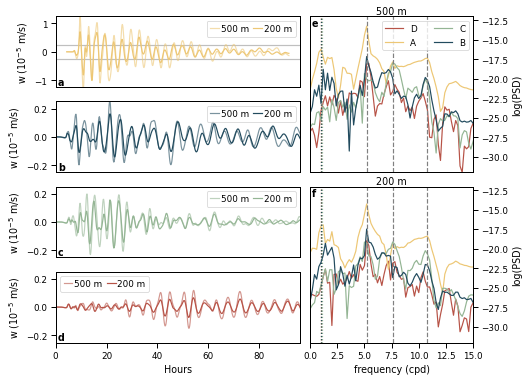

In [38]:
fig = plt.figure(figsize=(7.48,6))
gs0 = gridspec.GridSpec(1,2, width_ratios=[1.5,1], wspace=0.05, hspace=0.15)
gs01 = gridspec.GridSpecFromSubplotSpec(4, 1, subplot_spec=gs0[1])
gs00 = gridspec.GridSpecFromSubplotSpec(4, 1, subplot_spec=gs0[0])
ax1 = plt.subplot(gs01[0:2])
ax1b = plt.subplot(gs01[2:])
ax2 = plt.subplot(gs00[0])
ax3 = plt.subplot(gs00[1])
ax4 = plt.subplot(gs00[2])
ax5 = plt.subplot(gs00[3])
for ax in [ax2,ax3,ax4]:
    ax.set_xticks([])

ax5.set_xlabel('Hours')

for ax in [ax3,ax4,ax5]:
    ax.set_xlim(0,96)
    ax.set_ylim(-.25,.25)
ax2.set_ylim(-1.25,1.25)

# ---- time series ----
ax5.plot(times[:]/3600, var['w500'][0,:]*1E5, label='500 m', 
        color=colors[0], alpha=0.6)
ax5.plot(times[:]/3600, var['w200'][0,:]*1E5, label='200 m', 
        color=colors[0], alpha=1)

ax2.axhline(0.25,color='0.5', alpha=0.5)
ax2.axhline(-0.25,color='0.5', alpha=0.5)
ax2.plot(times[:]/3600, var['w500'][1,:]*1E5, label='500 m', 
        color=colors[1], alpha=0.6)
ax2.plot(times[:]/3600, var['w200'][1,:]*1E5, label='200 m', 
        color=colors[1], alpha=1)

ax4.plot(times[:]/3600, var['w500'][2,:]*1E5, label='500 m', 
        color=colors[2], alpha=0.6)
ax4.plot(times[:]/3600, var['w200'][2,:]*1E5, label='200 m', 
        color=colors[2], alpha=1)

ax3.plot(times[:]/3600, var['w500'][3,:]*1E5, label='500 m', 
        color=colors[3], alpha=0.6)
ax3.legend(ncol=2)
ax3.plot(times[:]/3600, var['w200'][3,:]*1E5, label='200 m', 
        color=colors[3], alpha=1)

for axx, lab in zip([ax2,ax3,ax4,ax5],['a','b','c','d']):
    axx.set_ylabel('w ($10^{-5}$ m/s)')
    axx.legend(ncol=2, handletextpad=0.2, columnspacing=0.5,handlelength=1 )
    axx.text(0.01,0.03,lab, fontweight='bold',transform=axx.transAxes)
   
# ----- spectra -------

st_names=['D','A','C','B']
for st, st_name, col, ind in zip(range(4), st_names, colors, [pta,ptb,ptc,ptd]):
    signalFFT = np.fft.rfft(var['w500'][st,:])
    signalFFTb = np.fft.rfft(var['w200'][st,:])
    
    ## Get Power Spectral Density
    signalPSD = np.abs(signalFFT) ** 2
    signalPSDb = np.abs(signalFFTb) ** 2
    
    ## Get frequencies corresponding to signal 
    fftFreq = np.fft.rfftfreq(len(var['w500'][st,:]), dt)
    fftFreqb = np.fft.rfftfreq(len(var['w200'][st,:]), dt)

    ax1.plot(fftFreq*86400,np.log(signalPSD[:]),col,label=st_name)
    ax1b.plot(fftFreqb*86400,np.log(signalPSDb[:]),col,label=st_name)
      
    f = 86400*2*omega*np.sin(np.radians(lat[ind[1]]))/(2*np.pi) #cpd
    print('%f' %f)
    ax1.axvline(f, color=col, linestyle=':')
    ax1b.axvline(f, color=col, linestyle=':')
    
ax1.legend(ncol=2)
ax1.set_ylabel('log(PSD)')
ax1.set_xlim(0,15)
ax1.set_ylim(-32, -12)
ax1.set_title('500 m', pad=0)
ax1.set_xticks([])
ax1.yaxis.tick_right()
ax1.yaxis.set_label_position("right")

ax1b.set_xlabel('frequency (cpd)')
ax1b.set_ylabel('log(PSD)')
ax1b.set_xlim(0,15)
ax1b.set_ylim(-32, -12)
ax1b.set_title('200 m', pad=0)
ax1b.yaxis.tick_right()
ax1b.yaxis.set_label_position("right")

for axx, lab in zip([ax1, ax1b], ['e','f']):
    axx.axvline(5.2, color='0.5', linestyle='--')
    axx.axvline(7.6, color='0.5', linestyle='--')
    axx.axvline(10.8, color='0.5', linestyle='--')
    axx.text(0.01,0.94,lab, fontweight='bold',transform=axx.transAxes)
   
plt.tight_layout()
plt.savefig('figure10.png', dpi=500, bbox_inches='tight')
plt.show()